In [1]:
#Imports
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv('bioactivitydata_descCalc.csv')
df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.522879
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.031517
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.376751
3,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.000000
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.397940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2160,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.920819
2161,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.602060
2162,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.000000
2163,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.537602


## Input Features
The Acetylocholinesterase data set contains 881 input features and 1 output variable (pIC50 values)

In [3]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

In [4]:
X.shape, Y.shape

((2165, 881), (2165,))

In [5]:
# remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)
X.shape

(2165, 130)

In [33]:
#Test-train split 80/20
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

Y_train = Y_train.to_numpy()
Y_test = Y_test.to_numpy()

X_train.shape, Y_train.shape

((1732, 130), (1732,))

In [34]:
X_test.shape, Y_test.shape

((433, 130), (433,))

## Building a regression model using random forest

In [35]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

-0.05478372759362049

In [36]:
Y_pred = model.predict(X_test)

array([ 7.45218665,  7.96604946,  9.85879135,  6.87940837,  7.80749051,
        6.09310097,  7.80749051,  8.52347986,  5.92206903,  8.48407082,
        8.27851485,  8.2730369 ,  8.03221286,  7.65486608,  6.91476357,
        6.67823574,  8.07315604,  8.04724516,  8.69040849,  7.80749051,
        7.07945823,  6.91203303,  6.97199671,  7.33542076,  7.24773477,
        7.74452812,  5.58737447,  7.98724782,  7.83952624,  4.85495296,
        7.61252486,  8.35738196,  8.80406749,  6.17846104,  7.71783297,
        8.49641798,  7.21574644,  7.93818873,  7.47630319,  8.73986064,
        7.41075978,  6.98435618,  6.9223785 ,  6.53501914,  5.207574  ,
        8.08185826,  6.80836006,  9.85879135,  6.70801706,  8.7893717 ,
        6.84994657,  5.92206903,  7.31447273,  6.60674613,  7.15190008,
        5.35869072,  7.53726001,  7.61231266,  8.99140258,  8.2594406 ,
        8.62005041,  8.10936335,  7.18376255,  5.32200877,  8.30139265,
        8.06888735,  8.27851485,  6.99105089,  6.89763774,  8.13

C:\Users\vandi\anaconda3\envs\bio\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show(close=None, block=None)>

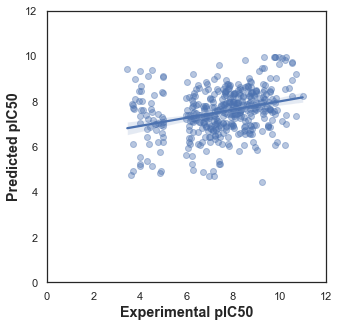

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

## Building a regression model using Deep Learning

In [11]:
#Dataset
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm

class RegressionDataset(Dataset):    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)
    

train_dataset = RegressionDataset(torch.from_numpy(X_train).float(), torch.from_numpy(Y_train).float())

test_dataset = RegressionDataset(torch.from_numpy(X_test).float(), torch.from_numpy(Y_test).float())

In [16]:
#Model

class Net(nn.Module):
    def __init__(self, in_dim):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(in_dim, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 1)

        self.dropout = nn.Dropout(p = 0.5)
        
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc3(x)
        x = self.relu(x)
        return x

In [17]:
num_epochs = 200
batch_size = 32
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

net = Net(in_dim=130)
net.to(device)

optimizer = torch.optim.Adam(net.parameters(), lr=0.002)
criterion = nn.MSELoss()

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=1)

loss_stats = {
    'train': [],
    "test": []
}

for e in tqdm(range(1, num_epochs+1)):
    train_epoch_loss = 0
    net.train()

    for x_train_batch, y_train_batch in train_loader:
        x_train_batch, y_train_batch = x_train_batch.to(device), y_train_batch.to(device)
        optimizer.zero_grad()

        y_train_pred = net(x_train_batch)

        train_loss = criterion(y_train_pred, y_train_batch.unsqueeze(1))

        train_loss.backward()
        optimizer.step()

        train_epoch_loss += train_loss.item()

    with torch.no_grad():
        test_epoch_loss=0

        net.eval()

        for x_test_batch, y_test_batch in test_loader:
            x_test_batch, y_test_batch = x_test_batch.to(device), y_test_batch.to(device)

            y_test_pred = net(x_test_batch)

            test_loss = criterion(y_test_pred, y_test_batch.unsqueeze(1))

            test_epoch_loss += test_loss.item()

    loss_stats['train'].append(train_epoch_loss/len(train_loader))
    loss_stats['test'].append(test_epoch_loss/len(test_loader))

    print(f'Epoch {e+0:03}: | Train Loss: {(train_epoch_loss/len(train_loader)):.5f} | Test Loss: {(test_epoch_loss/len(test_loader)):.5f}')

100%|██████████| 200/200 [01:12<00:00,  2.78it/s]Epoch 200: | Train Loss: 2.13071 | Test Loss: 2.72750



In [37]:
X_test = torch.from_numpy(X_test).float()
X_test = X_test.to(device)
Y_pred = net(X_test)
Y_pred = Y_pred.detach().to("cpu").numpy()

array([[6.022203 ],
       [7.028245 ],
       [9.459774 ],
       [7.487298 ],
       [7.4190574],
       [7.774349 ],
       [7.4190574],
       [7.7949533],
       [6.891349 ],
       [7.759185 ],
       [7.6916876],
       [7.4730806],
       [6.790793 ],
       [8.613782 ],
       [7.155262 ],
       [6.7508087],
       [7.845687 ],
       [7.4676714],
       [7.2491727],
       [7.4190574],
       [7.3372803],
       [7.5774775],
       [6.686759 ],
       [7.009501 ],
       [6.9409094],
       [6.099352 ],
       [6.047087 ],
       [7.879519 ],
       [7.406403 ],
       [6.871478 ],
       [7.8789153],
       [6.9945326],
       [7.517    ],
       [6.680457 ],
       [7.166383 ],
       [7.644516 ],
       [7.1645875],
       [7.1471014],
       [6.8938274],
       [7.419639 ],
       [6.3433447],
       [6.819199 ],
       [6.0864897],
       [7.1586647],
       [4.0475297],
       [7.5297203],
       [6.427911 ],
       [9.459774 ],
       [7.8583555],
       [7.1714544],


C:\Users\vandi\anaconda3\envs\bio\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show(close=None, block=None)>

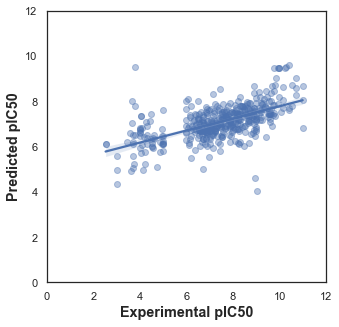

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show